In [248]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

#Model ML
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Project Houses prices Prediction

### Data Info

In [249]:
df=pd.read_csv("/kaggle/input/global-house-purchase-decision-dataset/global_house_purchase_dataset.csv")
df.head()

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
0,1,France,Marseille,Farmhouse,Semi-Furnished,991,412935,1989,6,6,...,10745,193949,15,6545,218986,0.16,1,5,6,0
1,2,South Africa,Cape Town,Apartment,Semi-Furnished,1244,224538,1990,4,8,...,16970,181465,20,8605,43073,0.08,9,1,2,0
2,3,South Africa,Johannesburg,Farmhouse,Semi-Furnished,4152,745104,2019,5,2,...,21914,307953,30,2510,437151,0.09,6,8,1,0
3,4,Germany,Frankfurt,Farmhouse,Semi-Furnished,3714,1110959,2008,1,3,...,17980,674720,15,8805,436239,0.33,2,6,6,0
4,5,South Africa,Johannesburg,Townhouse,Fully-Furnished,531,99041,2007,6,3,...,17676,65833,25,8965,33208,0.03,3,3,4,0


In [250]:
for col in df.columns:
  pct_missing= np.mean(df[col].isnull())
  print('{} - {}%'.format(col, round(pct_missing*100)))


property_id - 0%
country - 0%
city - 0%
property_type - 0%
furnishing_status - 0%
property_size_sqft - 0%
price - 0%
constructed_year - 0%
previous_owners - 0%
rooms - 0%
bathrooms - 0%
garage - 0%
garden - 0%
crime_cases_reported - 0%
legal_cases_on_property - 0%
customer_salary - 0%
loan_amount - 0%
loan_tenure_years - 0%
monthly_expenses - 0%
down_payment - 0%
emi_to_income_ratio - 0%
satisfaction_score - 0%
neighbourhood_rating - 0%
connectivity_score - 0%
decision - 0%


In [251]:
df_France=df[df['country']=='France']
df_France.head()

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
0,1,France,Marseille,Farmhouse,Semi-Furnished,991,412935,1989,6,6,...,10745,193949,15,6545,218986,0.16,1,5,6,0
64,65,France,Lyon,Farmhouse,Fully-Furnished,4658,1959099,2010,6,8,...,11735,1271792,25,3995,687307,0.73,2,6,6,0
66,67,France,Lyon,Farmhouse,Fully-Furnished,5773,2428383,1961,5,1,...,28610,1673981,15,19990,754402,0.51,6,8,10,0
85,86,France,Paris,Villa,Semi-Furnished,1082,458248,1979,3,8,...,29220,335969,15,7955,122279,0.10,9,9,6,1
90,91,France,Marseille,Apartment,Semi-Furnished,4312,1810683,1976,4,3,...,94040,1486951,15,16870,323732,0.14,5,7,5,0


#### We will remove irrelevant variables and avoid model cheating.

In [252]:
df_France=df_France.drop(columns=['property_id',
                    'city'
                    ,'loan_amount'
                    ,'emi_to_income_ratio'
                    ,'customer_salary'
                    ,'down_payment'
                    ,'monthly_expenses'
                    ,'loan_tenure_years',
                        'legal_cases_on_property',
                        'crime_cases_reported',
                        'decision',
                        'satisfaction_score',
                        'neighbourhood_rating',
                        'connectivity_score',
                        'previous_owners'])

In [253]:
df_France.head()

,country,property_type,furnishing_status,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden
0,France,Farmhouse,Semi-Furnished,991,412935,1989,6,2,1,1
64,France,Farmhouse,Fully-Furnished,4658,1959099,2010,8,6,0,1
66,France,Farmhouse,Fully-Furnished,5773,2428383,1961,1,1,1,0
85,France,Villa,Semi-Furnished,1082,458248,1979,8,3,0,0
90,France,Apartment,Semi-Furnished,4312,1810683,1976,3,2,1,1


In [254]:
df_France.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15628 entries, 0 to 199968
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country             15628 non-null  object
 1   property_type       15628 non-null  object
 2   furnishing_status   15628 non-null  object
 3   property_size_sqft  15628 non-null  int64 
 4   price               15628 non-null  int64 
 5   constructed_year    15628 non-null  int64 
 6   rooms               15628 non-null  int64 
 7   bathrooms           15628 non-null  int64 
 8   garage              15628 non-null  int64 
 9   garden              15628 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 1.3+ MB


In [255]:
df_France.describe()

,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden
count,15628.000000,1.562800e+04,15628.000000,15628.000000,15628.000000,15628.000000,15628.000000
mean,3198.106156,1.343234e+06,1991.469030,4.506719,2.766701,0.499488,0.500768
std,1615.835329,6.786449e+05,18.398346,2.297821,1.850380,0.500016,0.500015
min,400.000000,1.638420e+05,1960.000000,1.000000,1.000000,0.000000,0.000000
25%,1798.000000,7.551495e+05,1976.000000,2.000000,1.000000,0.000000,0.000000
50%,3205.500000,1.347494e+06,1991.000000,5.000000,2.000000,0.000000,1.000000
75%,4603.000000,1.934634e+06,2007.000000,6.000000,4.000000,1.000000,1.000000
max,6000.000000,2.523371e+06,2023.000000,8.000000,8.000000,1.000000,1.000000


In [256]:
df_France.value_counts()

country  property_type  furnishing_status  property_size_sqft  price    constructed_year  rooms  bathrooms  garage  garden
France   Apartment      Fully-Furnished    410                 174053   2022              3      1          0       1         1
         Townhouse      Fully-Furnished    546                 230386   2007              6      6          1       0         1
                                           576                 243826   1975              2      1          0       1         1
                                           581                 243921   1993              5      3          1       1         1
                                           590                 244924   2016              8      1          1       1         1
                                                                                                                             ..
         Farmhouse      Unfurnished        5837                2454498  1962              6      2          1

In [257]:
df_France.value_counts()

country  property_type  furnishing_status  property_size_sqft  price    constructed_year  rooms  bathrooms  garage  garden
France   Apartment      Fully-Furnished    410                 174053   2022              3      1          0       1         1
         Townhouse      Fully-Furnished    546                 230386   2007              6      6          1       0         1
                                           576                 243826   1975              2      1          0       1         1
                                           581                 243921   1993              5      3          1       1         1
                                           590                 244924   2016              8      1          1       1         1
                                                                                                                             ..
         Farmhouse      Unfurnished        5837                2454498  1962              6      2          1

                    property_size_sqft     price  constructed_year     rooms  \
property_size_sqft            1.000000  0.999991          0.003431 -0.003258   
price                         0.999991  1.000000          0.003440 -0.003282   
constructed_year              0.003431  0.003440          1.000000  0.001684   
rooms                        -0.003258 -0.003282          0.001684  1.000000   
bathrooms                    -0.000860 -0.000832         -0.000049  0.634396   
garage                        0.004341  0.004342          0.004478 -0.003534   
garden                       -0.000681 -0.000716         -0.004463  0.004869   

                    bathrooms    garage    garden  
property_size_sqft  -0.000860  0.004341 -0.000681  
price               -0.000832  0.004342 -0.000716  
constructed_year    -0.000049  0.004478 -0.004463  
rooms                0.634396 -0.003534  0.004869  
bathrooms            1.000000  0.001462  0.001024  
garage               0.001462  1.000000 -0.0056

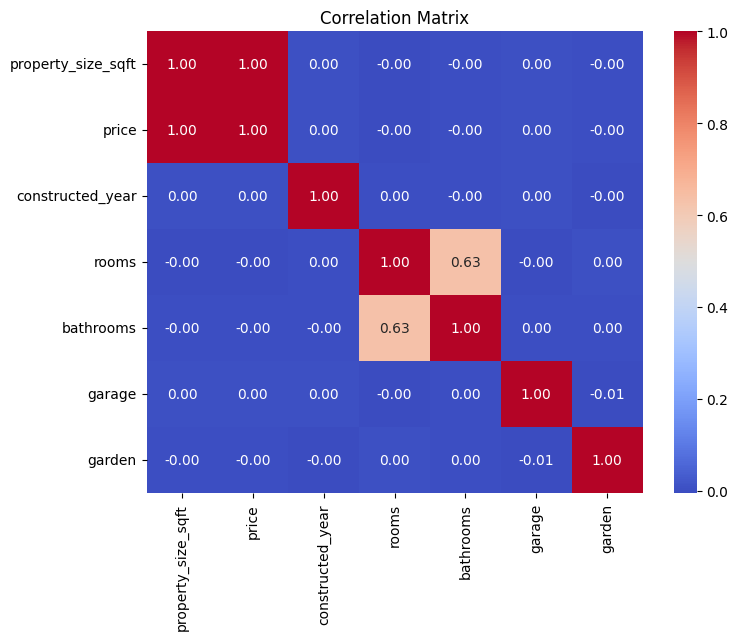

In [258]:
correlation_matrix = df_France.drop(columns=['country', 'property_type', 'furnishing_status']).corr()
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Mechine Learning

In [259]:
df_France=pd.get_dummies(df_France, columns=['property_type', 'furnishing_status'])
df_France.head()

,country,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden,property_type_Apartment,property_type_Farmhouse,property_type_Independent House,property_type_Studio,property_type_Townhouse,property_type_Villa,furnishing_status_Fully-Furnished,furnishing_status_Semi-Furnished,furnishing_status_Unfurnished
0,France,991,412935,1989,6,2,1,1,False,True,False,False,False,False,False,True,False
64,France,4658,1959099,2010,8,6,0,1,False,True,False,False,False,False,True,False,False
66,France,5773,2428383,1961,1,1,1,0,False,True,False,False,False,False,True,False,False
85,France,1082,458248,1979,8,3,0,0,False,False,False,False,False,True,False,True,False
90,France,4312,1810683,1976,3,2,1,1,True,False,False,False,False,False,False,True,False


In [260]:
df_France.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15628 entries, 0 to 199968
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   country                            15628 non-null  object
 1   property_size_sqft                 15628 non-null  int64 
 2   price                              15628 non-null  int64 
 3   constructed_year                   15628 non-null  int64 
 4   rooms                              15628 non-null  int64 
 5   bathrooms                          15628 non-null  int64 
 6   garage                             15628 non-null  int64 
 7   garden                             15628 non-null  int64 
 8   property_type_Apartment            15628 non-null  bool  
 9   property_type_Farmhouse            15628 non-null  bool  
 10  property_type_Independent House    15628 non-null  bool  
 11  property_type_Studio               15628 non-null  bool  
 12  property

In [261]:
X=df_France.drop(['price', 'country'], axis=1)
y=df_France['price']

In [262]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Linear Regresion Model and Visualitation

In [263]:
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr=lr.predict(X_test)
print("Linier Regresion  R² : ", r2_score(y_test, y_pred_lr))
print("Linier Regresion RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linier Regresion  R² :  0.9999819280008438
Linier Regresion RMSE :  2875.923257516631


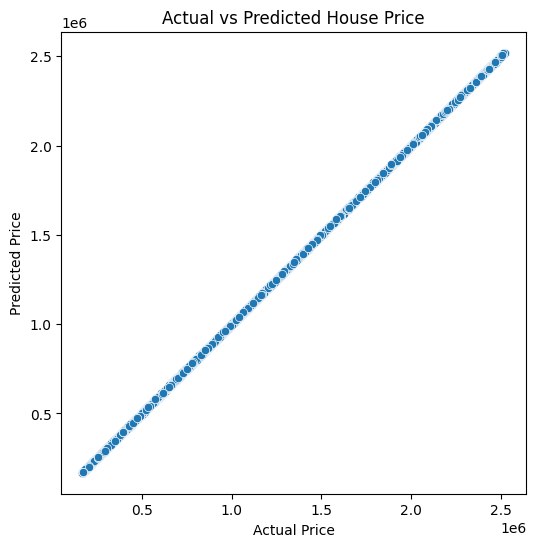

In [264]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=lr.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Decision Tree Model and Visualitation

In [265]:
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt=dt.predict(X_test)
print("Decision Tree  R² : ", r2_score(y_test, y_pred_dt))
print("Decision Tree RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Decision Tree  R² :  0.999960184371936
Decision Tree RMSE :  4268.752540955977


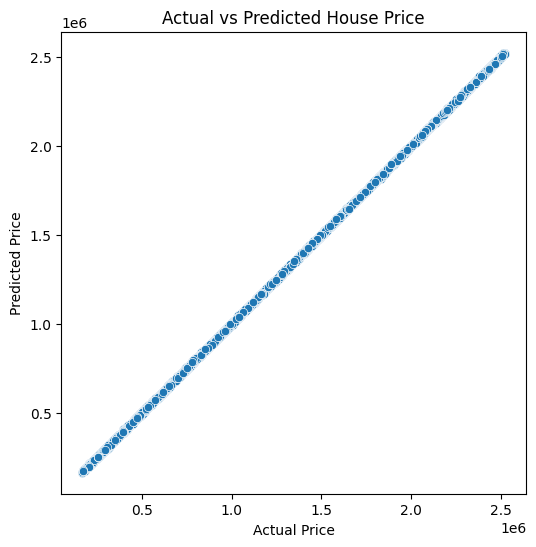

In [266]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=dt.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Random Forest Model and Visualitation

In [267]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
print("Random Forest  R² : ", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Random Forest  R² :  0.999977516417764
Random Forest RMSE :  4268.752540955977


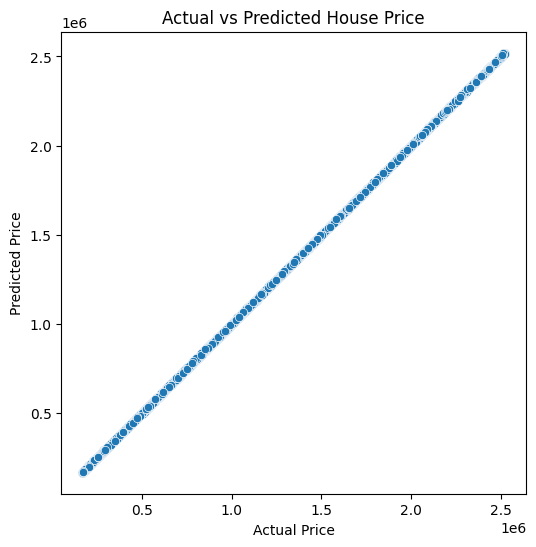

In [268]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=rf.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Gradient Boost Model and Visualization

In [269]:
gb=GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb=gb.predict(X_test)
print("Gradient Boost  R² : ", r2_score(y_test, y_pred_gb))
print("Gradient Boost RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Gradient Boost  R² :  0.9999309982637256
Gradient Boost RMSE :  4268.752540955977


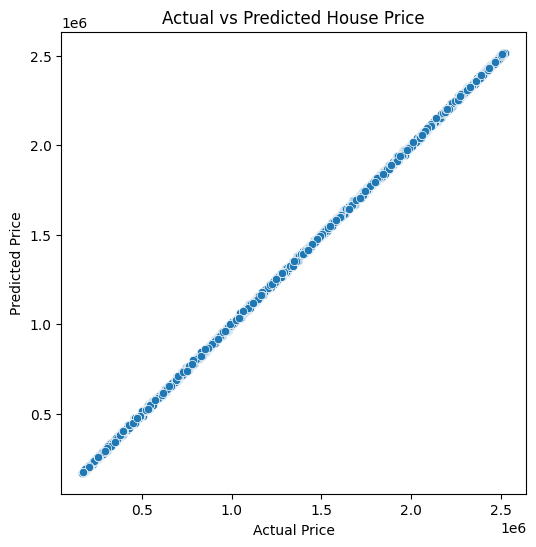

In [270]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=gb.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Result : $R^2$ and $RMSE$

In [271]:
result=pd.DataFrame({'metode':['lr', 'dt', 'rf', 'gb'],
       'R²':[ r2_score(y_test, y_pred_lr),
             r2_score(y_test, y_pred_dt),
             r2_score(y_test, y_pred_rf),
            r2_score(y_test, y_pred_gb)],
       'RMSE':[np.sqrt(mean_squared_error(y_test, y_pred_lr)),
               np.sqrt(mean_squared_error(y_test, y_pred_dt)),
              np.sqrt(mean_squared_error(y_test, y_pred_rf)),
              np.sqrt(mean_squared_error(y_test, y_pred_gb))]})


In [272]:
result

,metode,R²,RMSE
0,lr,0.999982,2875.923258
1,dt,0.999960,4268.752541
2,rf,0.999978,3207.797523
3,gb,0.999931,5619.584469
